In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [98]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D, Flatten
import numpy as np

In [108]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [109]:
print(X_train.shape, X_test.shape)
print(y_train.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [119]:
input_dim = (28,28,1) 
X_train = X_train[:6000].reshape(6000, 28, 28, 1) #28,28,1
X_test = X_test[:1000].reshape(1000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = y_train[:6000]
y_test = y_test[:1000]

In [120]:
output_dim = nb_classes = 10

In [121]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [122]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(6000, 28, 28, 1) (6000, 10) (1000, 28, 28, 1) (1000, 10)


In [132]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if __name__ == '__main__':
c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [133]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_129 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_130 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 10, 10, 8)       

In [136]:
batch_size = 32
nb_epoch = 15
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                   batch_size=batch_size,
                   nb_epoch=nb_epoch,
                   verbose=1,
                   validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose= 0)

c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 6000 samples, validate on 1000 samples
Epoch 1/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.6838 - accuracy: 0.7495 - val_loss: 34.4778 - val_accuracy: 0.1700
Epoch 2/15
6000/6000 [==============================] - 6s 1ms/step - loss: 0.6548 - accuracy: 0.7573 - val_loss: 3.8256 - val_accuracy: 0.1510
Epoch 3/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.6226 - accuracy: 0.7728 - val_loss: 80.3413 - val_accuracy: 0.0870
Epoch 4/15
6000/6000 [==============================] - 6s 1ms/step - loss: 0.5868 - accuracy: 0.7815 - val_loss: 2.3808 - val_accuracy: 0.2200
Epoch 5/15
6000/6000 [==============================] - 6s 979us/step - loss: 0.5687 - accuracy: 0.7915 - val_loss: 16.4384 - val_accuracy: 0.0920
Epoch 6/15
6000/6000 [==============================] - 6s 1ms/step - loss: 0.5600 - accuracy: 0.7913 - val_loss: 44.6719 - val_accuracy: 0.0870
Epoch 7/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.5555

In [126]:
score

[2.1698598957061765, 0.5249999761581421]

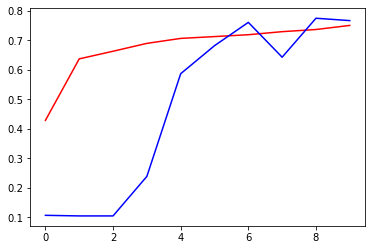

In [135]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.show()